In [23]:
import sklearn as sk
import pandas as pd
import numpy as np
import yfinance as yf
from volatility_tearsheet import volatility_table
from volatility_models import standard_deviation

In [24]:
historical_data = pd.read_csv("../tmp/price_data.csv")
vol = standard_deviation(historical_data)

<Axes: >

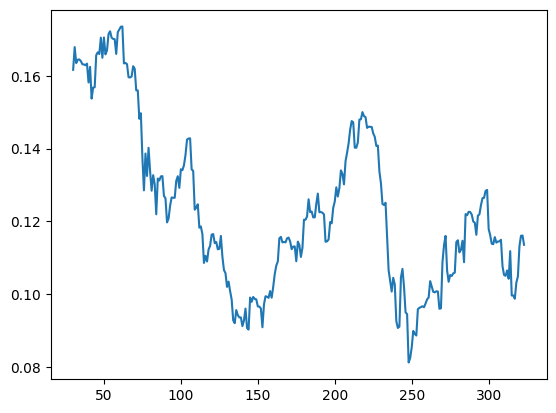

In [25]:
vol.plot()

In [22]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [54]:
def naive_model(train):
    """
    future 7 days == ave(past 7 days)
    """
    avg = train.rolling(window=7).mean().iloc[-1]
    pred = np.ones(7)*avg
    return pred

In [69]:
tscv = TimeSeriesSplit(n_splits=10, test_size=7)
mses = []
for train, test in tscv.split(vol):
    dtrain = vol.iloc[train]
    dtest = vol.iloc[test]
    pred = naive_model(dtrain)
    mses.append(mean_squared_error(dtest, pred))
print(f"Naive method = {np.mean(mses)}")

Naive method = 6.184571076759506e-05


In [79]:
from arch import arch_model

mses = []
for train, test in tscv.split(vol):
    dtrain = 0.1*historical_data['Close'].iloc[train]
    dtest = historical_data['Close'].iloc[test]

    am = arch_model(dtrain, vol="Garch", p=1, q=1)
    model_fit = am.fit()
    pred = model_fit.forecast(horizon=7)
    # p = np.sqrt(res.forecast(reindex=False, horizon=7).variance).mean(axis=1)
    # y = valid[valid['coin'] == coin]['target_realized_vol'].iloc[0]

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6255.548681039176
Iteration:      2,   Func. Count:     13,   Neg. LLF: 936.4054709812281
Iteration:      3,   Func. Count:     18,   Neg. LLF: 934.8567333644959
Iteration:      4,   Func. Count:     23,   Neg. LLF: 932.3279924297982
Iteration:      5,   Func. Count:     28,   Neg. LLF: 931.8979956347691
Iteration:      6,   Func. Count:     33,   Neg. LLF: 931.1797025295257
Iteration:      7,   Func. Count:     38,   Neg. LLF: 931.1836261768512
Iteration:      8,   Func. Count:     44,   Neg. LLF: 931.1755435396663
Iteration:      9,   Func. Count:     49,   Neg. LLF: 931.1734287207065
Iteration:     10,   Func. Count:     54,   Neg. LLF: 931.1714786304638
Iteration:     11,   Func. Count:     59,   Neg. LLF: 931.1714695946407
Iteration:     12,   Func. Count:     63,   Neg. LLF: 931.1714695940743
Optimization terminated successfully    (Exit mode 0)
            Current function value: 931.1714695946407
            Iterations: 12
 

In [85]:
0.1*np.sqrt(pred.variance.values)

array([[7.14489495, 7.15125171, 7.15760283, 7.16394831, 7.17028818,
        7.17662245, 7.18295113]])